In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks"


In [11]:
%cd /content/gdrive/My Drive/Colab Notebooks


/content/gdrive/My Drive/Colab Notebooks


In [12]:
!kaggle datasets download -d shubhamgoel27/dermnet --force

100% 1.72G/1.72G [00:29<00:00, 91.2MB/s]
100% 1.72G/1.72G [00:29<00:00, 62.5MB/s]


In [13]:
!ls

basictensorflow.ipynb			  mnisthandwriting.ipynb
cifar10.ipynb				  movieReviewSentimentAnalysis.ipynb
data.pickle				  musicGenerationDeeplearning.ipynb
dermnet.zip				  skin_allergy.ipynb
dogCatBreedPytorch.ipynb		  startofQlearningwithfrozenlake.ipynb
dogCatBreedTransferLearning.py		  textgenrationrnn.ipynb
half_finished_textGenerator.ipynb	  train.pickle
kaggle.json				  Untitled0.ipynb
logo.png				  Untitled.ipnyb
MIT_introthedeeplearing_lab1_part1.ipynb  Untitled.ipynb


In [14]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-107.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/kera

In [16]:
!ls


basictensorflow.ipynb			  musicGenerationDeeplearning.ipynb
cifar10.ipynb				  skin_allergy.ipynb
data.pickle				  startofQlearningwithfrozenlake.ipynb
dogCatBreedPytorch.ipynb		  test
dogCatBreedTransferLearning.py		  textgenrationrnn.ipynb
half_finished_textGenerator.ipynb	  train
kaggle.json				  train.pickle
logo.png				  Untitled0.ipynb
MIT_introthedeeplearing_lab1_part1.ipynb  Untitled.ipnyb
mnisthandwriting.ipynb			  Untitled.ipynb
movieReviewSentimentAnalysis.ipynb


In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image

In [21]:
p=Path('./train')
dirs=p.glob('*')
image_data=[]
labels=[]
categories=[]
y_label=[]
for d in dirs:
    categories.append((str(d).split('/')[-1]))
    for img_path in d.glob('*.jpg'):
        img=image.load_img(img_path)
        gray=cv2.resize(np.float32(img),(80,80))
        img_array=image.img_to_array(gray)
        image_data.append(img_array)
        labels.append((str(d).split('/')[-1]))
for i in range(len(labels)):
    y_label.append(categories.index(labels[i]))

In [22]:
x=np.array(image_data)/255
y=np.array(y_label)

In [23]:
y

array([ 0,  0,  0, ..., 22, 22, 22])

In [25]:
from sklearn.utils import shuffle
train_data,train_label=shuffle(x,y,random_state=0)
import pickle
with open('train_skin.pickle', 'wb') as f:
    pickle.dump([train_data, train_label], f)






5


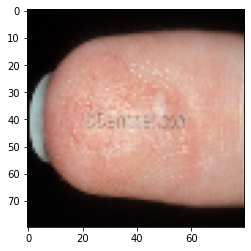

In [26]:
plt.imshow(x[3487])
print(y[3487])




In [28]:
#backbone = tf.keras.applications.ResNet50(input_shape=(100,100,3),weights='imagenet', include_top=False)

backbone=tf.keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=(80, 80, 3)
)

backbone.trainable = False

#sexy model

model = tf.keras.models.Sequential()
model.add(backbone)
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(250,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(35, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['acc'])


    

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               128250    
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)              

In [29]:

checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 period=5)


model.save_weights(checkpoint_path.format(epoch=0))

try:
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest)
except:
    pass

history = model.fit(train_data,train_label,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[cp_callback])

Epoch 1/20
389/389 [==============================] - 11s 29ms/step - loss: 3.0258 - acc: 0.1329 - val_loss: 2.8048 - val_acc: 0.1928
Epoch 2/20
389/389 [==============================] - 11s 27ms/step - loss: 2.8154 - acc: 0.1735 - val_loss: 2.7359 - val_acc: 0.2069
Epoch 3/20
389/389 [==============================] - 11s 27ms/step - loss: 2.7515 - acc: 0.1891 - val_loss: 2.6693 - val_acc: 0.2288
Epoch 4/20
389/389 [==============================] - 11s 28ms/step - loss: 2.6977 - acc: 0.2032 - val_loss: 2.6447 - val_acc: 0.2211
Epoch 5/20
388/389 [============================>.] - ETA: 0s - loss: 2.6664 - acc: 0.2123
Epoch 00005: saving model to training_2/cp-0005.ckpt
389/389 [==============================] - 11s 29ms/step - loss: 2.6664 - acc: 0.2121 - val_loss: 2.6323 - val_acc: 0.2240
Epoch 6/20
389/389 [==============================] - 11s 28ms/step - loss: 2.6353 - acc: 0.2211 - val_loss: 2.6278 - val_acc: 0.2330
Epoch 7/20
389/389 [==============================] - 11s 28ms/

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:

pred_image=image.load_img('')
gray_pred=cv2.resize(np.float32(pred_image),(100,100))
pred_img_array=image.img_to_array(gray_pred)
pred_img_array=np.array(pred_img_array)/255
x_pred=pred_img_array.reshape((-1,100,100,3))

predicted_category=categories[np.argmax(model.predict([x_pred]))]
print(predicted_category)